# DISPLAYING TABLE (CSV)
In this section, we are making sure that we have access to the table and storing it to a variable called air_data. Our dataset is from the example website provided to us on the assignment, the London Air Quality. (URL: https://www.londonair.org.uk/london/asp/datasite.asp?CBXSpecies1=COm&CBXSpecies2=NOm&CBXSpecies3=NO2m&CBXSpecies4=NOXm&CBXSpecies5=O3m&day1=1&month1=jan&year1=2018&day2=1&month2=jan&year2=2019&period=15min&ratidate=&site=HI0&res=6&Submit=Plot%20graph)

What the below code does is it reads from our data folder and uses the LaqnData.csv file in order to prepare it for reading. Once it reads this csv file, all 'NA' and '?' values are turned into pandas 'NaN' value for null values. We want to read first and then dispaly because if we try to display the information from the csv file without reading then nothing would happen or it will return back an error since we do not have any information to display.

In [23]:
# DISPLAYING TABLE (CSV)
import os
import numpy as np
import pandas as pd

path = "./data/"

filename_read = os.path.join(path,"LaqnData.csv")
air_Data = pd.read_csv(filename_read, na_values=['NA','?'])

# use inplace=False
air_Data

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HI0,CO,01/01/2018 00:00,NaN,mg m-3,P
1,HI0,CO,01/01/2018 00:15,NaN,mg m-3,P
2,HI0,CO,01/01/2018 00:30,NaN,mg m-3,P
3,HI0,CO,01/01/2018 00:45,NaN,mg m-3,P
4,HI0,CO,01/01/2018 01:00,NaN,mg m-3,P
...,...,...,...,...,...,...
175195,HI0,O3,31/12/2018 22:45,57.0,ug m-3,R
175196,HI0,O3,31/12/2018 23:00,61.1,ug m-3,R
175197,HI0,O3,31/12/2018 23:15,61.1,ug m-3,R
175198,HI0,O3,31/12/2018 23:30,61.1,ug m-3,R


# MISSING VALUE
In this portion, we are looking for the amount of missing values in each column. In here, since we have previously read and store the LaqnData.csv we are still able to use the variable: air_Data. The first code portion is checking to see where all empty value are and replacing them with pandas NaN so that we can see where all the missing values are base off the column they are in. As seen below, we found that there are 43476 missing values in the Value column for the LaqnData.csv set.

In [24]:
# MISSING INPUTS

import numpy as np

air_Data = air_Data.replace('', np.NaN)

print('Number of instances = %d' % (air_Data.shape[0]))
print('Number of attributes = %d' % (air_Data.shape[1]))

print('Number of missing values:')
for col in air_Data.columns:
    print('\t%s: %d' % (col,air_Data[col].isna().sum()))

Number of instances = 175200
Number of attributes = 6
Number of missing values:
	Site: 0
	Species: 0
	ReadingDateTime: 0
	Value: 43476
	Units: 0
	Provisional or Ratified: 0


This section of code is showcasing how we can replace all the 'NaN', or missing values, in the dataset into something else. We first display the column that has the missing value, which luckily for us is only the 'Value' column. By showing the total amount of rows and seeing all the values in this column, we then fill each 'NaN' value with a different value. For us, we thought replacing all 'NaN' with a '?' is better as we do not want to use a random value that could potentially mess up the dataset. Lastly, on our last line of code, we output what dropping all the missing values would be like. Dropping all missing values would provide us with a table of rows with all fields filled with values. We can also see the total amount of rows before dropping all missing values to when we drop them.

In [25]:
# Replacing all the empty values to be 'NaN'
data = air_Data['Value']

print('Before replacing missing values:')
print(data)
data = data.fillna("?")

print('\nAfter replacing missing values:')
print(data)

data = air_Data.dropna()
print('Number of rows after discarding missing values = %d' % (data.shape[0]))

Before replacing missing values:
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
175195    57.0
175196    61.1
175197    61.1
175198    61.1
175199    61.1
Name: Value, Length: 175200, dtype: float64

After replacing missing values:
0            ?
1            ?
2            ?
3            ?
4            ?
          ... 
175195    57.0
175196    61.1
175197    61.1
175198    61.1
175199    61.1
Name: Value, Length: 175200, dtype: object
Number of rows after discarding missing values = 131724


This tiny section of code is used to just put into perspective of how many missing values were discard in this dataset. As we can see, we originally have 175200 rows but once we drop all the missing values, we are left with 131724

In [26]:
# Showing the new amount of rows left after discarding the empty values
print('Number of rows in original data = %d' % (air_Data.shape[0]))

data = air_Data.dropna()
print('Number of rows after discarding missing values = %d' % (data.shape[0]))

Number of rows in original data = 175200
Number of rows after discarding missing values = 131724


# OUTLIERS

For this section of data preprocessing, we had to use a different dataset as our previous dataset, LaqnData.csv, only had 1 column with integer value. Because of that, we weren't getting a proper look at figuring out what was the outlier for that dataset which is why we used the drinks.csv dataset in the canvas file Lab Help/Labs/data/. As seen below, we read the drinks.csv file and then we want to make sure we drop any columns that does not have any Integer values in them since the boxplot only wants to read integer values. We drop the 'country' and 'continent' column because it has String input. Once we drop all the unnecessary columns, we then use the remaining columns to plot and find out all the outliers. that are outside the rectangle box.

<Axes: >

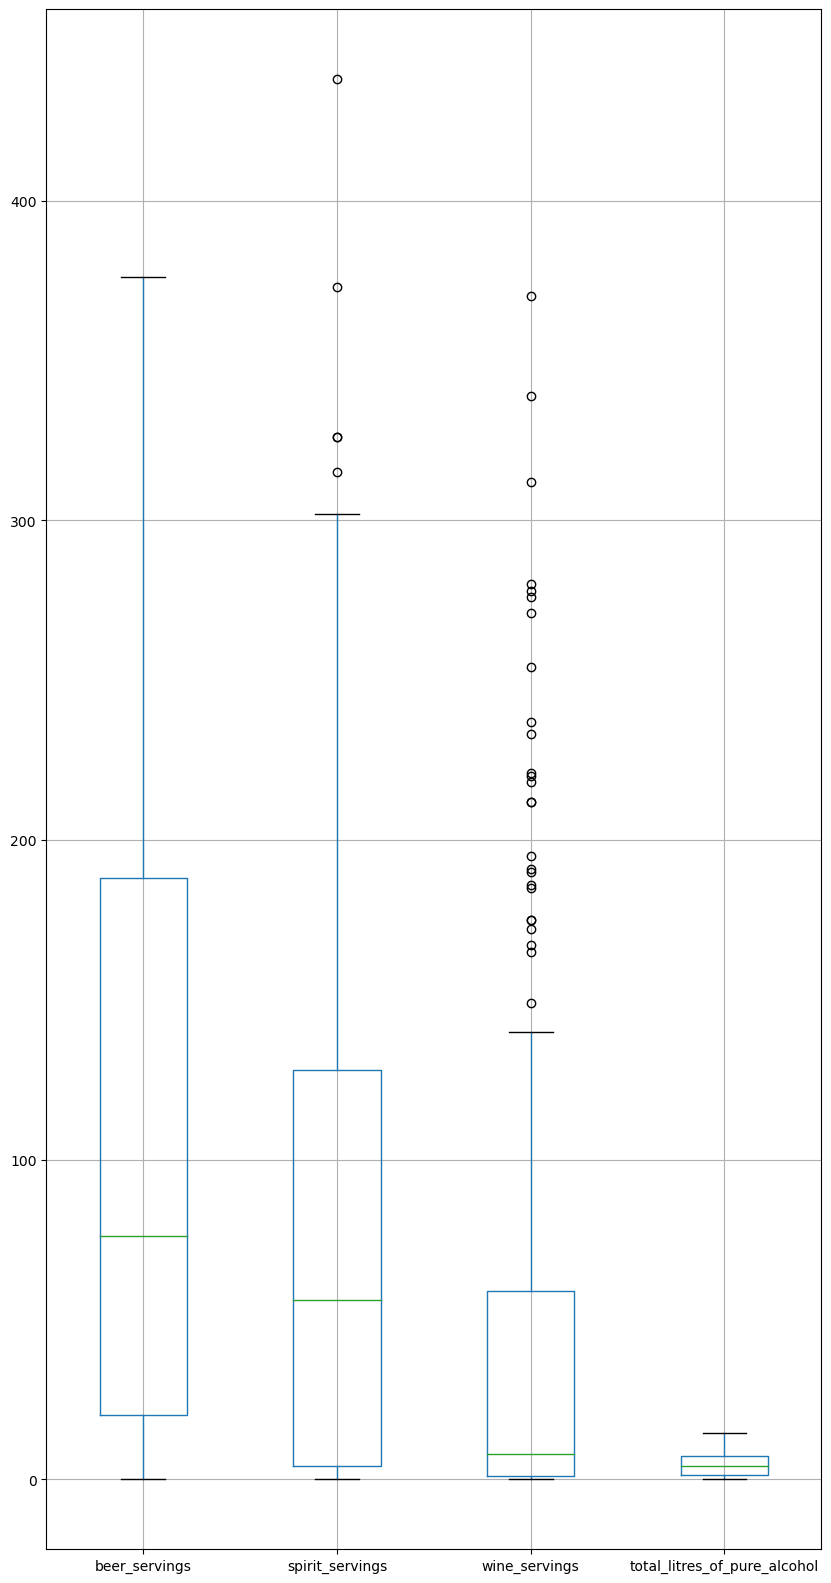

In [89]:
%matplotlib inline

path = "./data/"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read, na_values=['NA','?'])

data2 = drink_Data.drop(['country', 'continent'],axis=1)
data2.boxplot(figsize=(10,20))

In the code below, we are finding the standarization of each row. Note that because we are still using the variable data2, it does not have the column 'country' and 'continent'. We apply the formula for standarzing and then print out each row standarization.

In [28]:
Z = (data2-data2.mean())/data2.std()
Z

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,-1.049608,-0.917432,-0.620480,-1.250126
1,-0.169667,0.577738,0.057081,0.048473
2,-0.802434,-0.917432,-0.444816,-1.064612
3,1.372702,0.645700,3.294318,2.036124
4,1.095867,-0.271790,-0.055846,0.313493
...,...,...,...,...
188,2.242757,0.215272,-0.582838,0.790529
189,0.047847,-0.894778,-0.607933,-0.720086
190,-0.990286,-0.917432,-0.620480,-1.223624
191,-0.733225,-0.702218,-0.570290,-0.587576


This code below is showcasing the total amount of rows with outliers and the total amount of rows with missing values. Because this dataset (drink.csv) does not have any missing values, we are only looking at the amount of outliers in this dataset.

In [29]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))
Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9)]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 193
Number of rows after discarding missing values = 0


The code below is showing what sorting by a column is like. We go back to using the air_Data for this one since it is easier to see when using the ReadingDateTime column

In [30]:
# SORTING BY DATE/TIME
air_Data = air_Data.sort_values(by='ReadingDateTime',ascending=True)
air_Data

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HI0,CO,01/01/2018 00:00,NaN,mg m-3,P
105120,HI0,NOX,01/01/2018 00:00,26.2,ug m-3 as NO2,R
35040,HI0,NO,01/01/2018 00:00,7.1,ug m-3,R
70080,HI0,NO2,01/01/2018 00:00,15.3,ug m-3,R
140160,HI0,O3,01/01/2018 00:00,56.7,ug m-3,R
...,...,...,...,...,...,...
70079,HI0,NO,31/12/2018 23:45,NaN,ug m-3,R
35039,HI0,CO,31/12/2018 23:45,NaN,mg m-3,P
105119,HI0,NO2,31/12/2018 23:45,NaN,ug m-3,R
140159,HI0,NOX,31/12/2018 23:45,NaN,ug m-3 as NO2,R


# Duplicate Data
In this section, we are seeing what duplicating a dataframe is like. We will be using the dataset: drinks.csv and will be outputting the rows that have duplicates. From below, we use the function dupliated() to figure out all of the rows that has the same values as another row. As seen from below, the drinks.csv dataset has 10 duplicate rows and we showed the row at index 0 and 13 to provide a picture.

NOTE: we had to make sure to ignore the 'country' column since this dataset would not provide us with any duplicates as each row has a different country value.

In [90]:
#DUPLICATE DATA SET USING THE DRINKS.CSV SET
path = "./data/"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read, na_values=['NA','?'])

dups = drink_Data.loc[:, drink_Data.columns != 'country'].duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
drink_Data.loc[[0,13]]

Number of duplicate rows = 10


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
13,Bangladesh,0,0,0,0.0,Asia


The below code outputs the total amount of rows before we discard the duplicates rows. We can easily drop our duplicates with the function drop_duplicates().

In [32]:
print('Number of rows before discarding duplicates = %d' % (drink_Data.shape[0]))
data2 = drink_Data.loc[:, drink_Data.columns != 'country'].drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 193
Number of rows after discarding duplicates = 183


# Shuffling Dataframes

For this section, Shuffling Dataframes, we essentially use a dataset and mix up the entire table. We are using the LaqnData set. When running this code, each rows would have different values in them because we are shuffling around the valeus in each columns.

In [93]:
#SHUFFLING DATAFRAME
path = "./data/"

filename_read = os.path.join(path,"LaqnData.csv")
air_Data = pd.read_csv(filename_read, na_values=['NA','?'])
#np.random.seed(30) # Uncomment this line to get the same shuffle each time

air_Data = air_Data.reindex(np.random.permutation(air_Data.index))
air_Data.reset_index(inplace=True, drop=True)
# use inplace=False
air_Data

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HI0,NO2,29/06/2018 05:00,11.3,ug m-3,R
1,HI0,CO,29/03/2018 14:45,NaN,mg m-3,P
2,HI0,NOX,26/07/2018 19:30,124.2,ug m-3 as NO2,R
3,HI0,NO2,24/12/2018 21:00,NaN,ug m-3,R
4,HI0,O3,25/01/2018 13:30,26.6,ug m-3,R
...,...,...,...,...,...,...
175195,HI0,O3,17/07/2018 02:15,45.6,ug m-3,R
175196,HI0,NO,03/05/2018 13:15,9.0,ug m-3,R
175197,HI0,NO,01/05/2018 14:15,26.5,ug m-3,R
175198,HI0,NO2,12/12/2018 12:30,84.0,ug m-3,R


# Sorting Dataframes

We sort the values by species and ascending, then output the dataframe.

In [82]:
air_Data = air_Data.sort_values(by='Species',ascending=True)
air_Data

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
116788,HI0,CO,02/12/2018 14:00,NaN,mg m-3,P
32008,HI0,CO,04/03/2018 17:45,NaN,mg m-3,P
79470,HI0,CO,28/03/2018 01:30,NaN,mg m-3,P
32012,HI0,CO,09/01/2018 10:30,NaN,mg m-3,P
159171,HI0,CO,03/03/2018 13:45,NaN,mg m-3,P
...,...,...,...,...,...,...
53314,HI0,O3,08/06/2018 07:45,43.5,ug m-3,R
95838,HI0,O3,24/11/2018 00:15,0.9,ug m-3,R
53308,HI0,O3,07/11/2018 20:15,3.6,ug m-3,R
95840,HI0,O3,08/06/2018 22:30,51.9,ug m-3,R


iloc selects via the actual table, since CO is first on the list after sorting the dataframe, it is selected. loc on the otherhand, uses the index values assigned to each row in the dataset. Index number 0 contains 03, so 03 is selected.

In [83]:
print("The first species is: {}".format(air_Data['Species'].iloc[0]))

The first species is: CO


In [84]:
print("The first species is: {}".format(air_Data['Species'].loc[0]))

The first species is: NO


# Saving a Dataframe

filename_read selects LaqnData.csv from the Data folder and filename_write selects LaqnData-shuffle.csv. Then the values of LaqnData.csv get read by air_Data, then air_Data gets shuffled randomly by permutation and then written to LaqnData-shuffle.csv.

In [37]:
#SAVING A DATAFRAME
filename_read = os.path.join(path,"LaqnData.csv")
filename_write = os.path.join(path,"LaqnData-shuffle.csv")
air_Data = pd.read_csv(filename_read,na_values=['NA','?'])
air_Data = air_Data.reindex(np.random.permutation(air_Data.index))
air_Data.to_csv(filename_write,index=False)   # Specify index = false to not write row numbers
print("Done")

Done


# Dropping Fields

air_Data copies filename_read's data and then the air_Data.drop() function removes the column 'Site' from the data frame.

In [38]:
#DROPPING FIELDS
path = "./data/"

filename_read = os.path.join(path,"LaqnData.csv")
air_Data = pd.read_csv(filename_read,na_values=['NA','?'])

print("Before drop: {}".format(air_Data.columns))
air_Data.drop('Site', axis=1, inplace=True)
print("After drop: {}".format(air_Data.columns))
air_Data[0:5]

Before drop: Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')
After drop: Index(['Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')


,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CO,01/01/2018 00:00,NaN,mg m-3,P
1,CO,01/01/2018 00:15,NaN,mg m-3,P
2,CO,01/01/2018 00:30,NaN,mg m-3,P
3,CO,01/01/2018 00:45,NaN,mg m-3,P
4,CO,01/01/2018 01:00,NaN,mg m-3,P


# Calculate Fields

A Total Servings column is added to drink_Data, by drink_Data.insert(), and then each row is filled by (beer_servings + spirit_servings + wine_servings).

In [39]:
#CALCULATED FIELDS USING DRINKS.csv
filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read,na_values=['NA','?'])
drink_Data.insert(1,'Total Servings',(drink_Data['beer_servings']+drink_Data['spirit_servings']+drink_Data['wine_servings']).astype(int))
drink_Data
#print(drink_Data)

,country,Total Servings,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0,0.0,Asia
1,Albania,275,89,132,54,4.9,Europe
2,Algeria,39,25,0,14,0.7,Africa
3,Andorra,695,245,138,312,12.4,Europe
4,Angola,319,217,57,45,5.9,Africa
...,...,...,...,...,...,...,...
188,Venezuela,436,333,100,3,7.7,South America
189,Vietnam,114,111,2,1,2.0,Asia
190,Yemen,6,6,0,0,0.1,Asia
191,Zambia,55,32,19,4,2.5,Africa


# Feature Normalization

The z-score is used to find how close to the average an item is. We select total_litres_of_pure_alcohol because it provides the best description for the z-score. The column 'total_litres_of_pure_alcohol' changes it's values to it's z-score via the function zscore().

In [40]:
#FEATURE NORMALIZATION
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read,na_values=['NA','?'])
drink_Data['total_litres_of_pure_alcohol'] = zscore(drink_Data['total_litres_of_pure_alcohol'])
drink_Data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,-1.253377,Asia
1,Albania,89,132,54,0.048599,Europe
2,Algeria,25,0,14,-1.067381,Africa
3,Andorra,245,138,312,2.041419,Europe
4,Angola,217,57,45,0.314308,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,0.792585,South America
189,Vietnam,111,2,1,-0.721959,Asia
190,Yemen,6,0,0,-1.226806,Asia
191,Zambia,32,19,4,-0.589104,Africa


# Missing Values

In [41]:
#MISSING VALUES
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore

path = "./data/"

filename_read = os.path.join(path,"LaqnData.csv")
air_Data = pd.read_csv(filename_read,na_values=['NA','?'])
med = air_Data['Value'].median()
air_Data['Value'] = air_Data['Value'].fillna(med)
# air_Data = air_Data.dropna() # you can also simply drop NA values

# Concatenating Rows and Columns

In [42]:
#Concatenating Rows and Columns
# Create a new dataframe from name and horsepower

import os
import pandas as pd
import numpy as np
from scipy.stats import zscore

path = "./data/"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read,na_values=['NA','?'])
col_country = drink_Data['country']
col_continent = drink_Data['continent']
result = pd.concat([col_country,col_continent],axis=1)
result

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa
...,...,...
188,Venezuela,South America
189,Vietnam,Asia
190,Yemen,Asia
191,Zambia,Africa


In [43]:
# Create a new dataframe from country and continent, but this time by row
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore

path = "./data/"

filename_read = os.path.join(path,"drinks.csv")
air_Data = pd.read_csv(filename_read,na_values=['NA','?'])
col_country = air_Data['country']
col_continent = air_Data['continent']
result = pd.concat([col_country,col_continent])
result

0        Afghanistan
1            Albania
2            Algeria
3            Andorra
4             Angola
           ...      
188    South America
189             Asia
190             Asia
191           Africa
192           Africa
Length: 386, dtype: object

# Helpful Functions for Tensorflow (Little Gems)

In [44]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(data, name):
    dummies = pd.get_dummies(data[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        data[dummy_name] = dummies[x]
    data.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(data, name):
    le = preprocessing.LabelEncoder()
    data[name] = le.fit_transform(data[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(data, name, mean=None, sd=None):
    if mean is None:
        mean = data[name].mean()

    if sd is None:
        sd = data[name].std()

    data[name] = (data[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(data, name):
    med = data[name].median()
    data[name] = data[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(data, name, default_value):
    data[name] = data[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(data, target):
    result = []
    for x in data.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = data[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.abc.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(data[target])
        return data[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return data[result].values.astype(np.float32), data[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(data, name, sd):
    drop_rows = data.index[(np.abs(data[name] - data[name].mean()) >= (sd * data[name].std()))]
    data.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(data, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(data[name])
        data_high = max(data[name])

    data[name] = ((data[name] - data_low) / (data_high - data_low)) * (normalized_high - normalized_low) + normalized_low

## Examples of label encoding, one hot encoding, and creating X/Y for TensorFlow

In [45]:
air_Data = pd.read_csv("data/LaqnData.csv", na_values=['NaN', '?'])
air_Data

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HI0,CO,01/01/2018 00:00,NaN,mg m-3,P
1,HI0,CO,01/01/2018 00:15,NaN,mg m-3,P
2,HI0,CO,01/01/2018 00:30,NaN,mg m-3,P
3,HI0,CO,01/01/2018 00:45,NaN,mg m-3,P
4,HI0,CO,01/01/2018 01:00,NaN,mg m-3,P
...,...,...,...,...,...,...
175195,HI0,O3,31/12/2018 22:45,57.0,ug m-3,R
175196,HI0,O3,31/12/2018 23:00,61.1,ug m-3,R
175197,HI0,O3,31/12/2018 23:15,61.1,ug m-3,R
175198,HI0,O3,31/12/2018 23:30,61.1,ug m-3,R


In [46]:
encode_text_index(air_Data, "Species") # Label encoding
air_Data

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HI0,0,01/01/2018 00:00,NaN,mg m-3,P
1,HI0,0,01/01/2018 00:15,NaN,mg m-3,P
2,HI0,0,01/01/2018 00:30,NaN,mg m-3,P
3,HI0,0,01/01/2018 00:45,NaN,mg m-3,P
4,HI0,0,01/01/2018 01:00,NaN,mg m-3,P
...,...,...,...,...,...,...
175195,HI0,4,31/12/2018 22:45,57.0,ug m-3,R
175196,HI0,4,31/12/2018 23:00,61.1,ug m-3,R
175197,HI0,4,31/12/2018 23:15,61.1,ug m-3,R
175198,HI0,4,31/12/2018 23:30,61.1,ug m-3,R


In [47]:
encode_text_index(air_Data, "Species") # label encoding
air_Data

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HI0,0,01/01/2018 00:00,NaN,mg m-3,P
1,HI0,0,01/01/2018 00:15,NaN,mg m-3,P
2,HI0,0,01/01/2018 00:30,NaN,mg m-3,P
3,HI0,0,01/01/2018 00:45,NaN,mg m-3,P
4,HI0,0,01/01/2018 01:00,NaN,mg m-3,P
...,...,...,...,...,...,...
175195,HI0,4,31/12/2018 22:45,57.0,ug m-3,R
175196,HI0,4,31/12/2018 23:00,61.1,ug m-3,R
175197,HI0,4,31/12/2018 23:15,61.1,ug m-3,R
175198,HI0,4,31/12/2018 23:30,61.1,ug m-3,R


In [48]:
air_Data = pd.read_csv("data/LaqnData.csv", na_values=['NaN', '?'])

encode_text_dummy(air_Data, "Species") # One hot encoding
air_Data

,Site,ReadingDateTime,Value,Units,Provisional or Ratified,Species-CO,Species-NO,Species-NO2,Species-NOX,Species-O3
0,HI0,01/01/2018 00:00,NaN,mg m-3,P,1,0,0,0,0
1,HI0,01/01/2018 00:15,NaN,mg m-3,P,1,0,0,0,0
2,HI0,01/01/2018 00:30,NaN,mg m-3,P,1,0,0,0,0
3,HI0,01/01/2018 00:45,NaN,mg m-3,P,1,0,0,0,0
4,HI0,01/01/2018 01:00,NaN,mg m-3,P,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
175195,HI0,31/12/2018 22:45,57.0,ug m-3,R,0,0,0,0,1
175196,HI0,31/12/2018 23:00,61.1,ug m-3,R,0,0,0,0,1
175197,HI0,31/12/2018 23:15,61.1,ug m-3,R,0,0,0,0,1
175198,HI0,31/12/2018 23:30,61.1,ug m-3,R,0,0,0,0,1


## Make sure you encode the lables first before you call to_xy()

In [49]:
drink_Data = pd.read_csv("data/drinks.csv", na_values=['NaN', '?'])

encode_text_index(drink_Data, "country") # encoding first before you call to_xy()
encode_text_index(drink_Data, "continent")

drink_Data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,0,0,0,0.0,1
1,1,89,132,54,4.9,2
2,2,25,0,14,0.7,0
3,3,245,138,312,12.4,2
4,4,217,57,45,5.9,0
...,...,...,...,...,...,...
188,188,333,100,3,7.7,5
189,189,111,2,1,2.0,1
190,190,6,0,0,0.1,1
191,191,32,19,4,2.5,0


In [50]:
x,y = to_xy(drink_Data, "continent")

In [51]:
x

array([[0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 8.90e+01, 1.32e+02, 5.40e+01, 4.90e+00],
       [2.00e+00, 2.50e+01, 0.00e+00, 1.40e+01, 7.00e-01],
       [3.00e+00, 2.45e+02, 1.38e+02, 3.12e+02, 1.24e+01],
       [4.00e+00, 2.17e+02, 5.70e+01, 4.50e+01, 5.90e+00],
       [5.00e+00, 1.02e+02, 1.28e+02, 4.50e+01, 4.90e+00],
       [6.00e+00, 1.93e+02, 2.50e+01, 2.21e+02, 8.30e+00],
       [7.00e+00, 2.10e+01, 1.79e+02, 1.10e+01, 3.80e+00],
       [8.00e+00, 2.61e+02, 7.20e+01, 2.12e+02, 1.04e+01],
       [9.00e+00, 2.79e+02, 7.50e+01, 1.91e+02, 9.70e+00],
       [1.00e+01, 2.10e+01, 4.60e+01, 5.00e+00, 1.30e+00],
       [1.10e+01, 1.22e+02, 1.76e+02, 5.10e+01, 6.30e+00],
       [1.20e+01, 4.20e+01, 6.30e+01, 7.00e+00, 2.00e+00],
       [1.30e+01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.40e+01, 1.43e+02, 1.73e+02, 3.60e+01, 6.30e+00],
       [1.50e+01, 1.42e+02, 3.73e+02, 4.20e+01, 1.44e+01],
       [1.60e+01, 2.95e+02, 8.40e+01, 2.12e+02, 1.05e+01

In [52]:
y

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

# Example of Deal with Missing Values and Outliers

In [53]:
path = "./data/"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read,na_values=['NaN','?'])
# Handle mising values in total_litres_of_pure_alcohol
missing_median(drink_Data, 'total_litres_of_pure_alcohol')
#drink_Data.drop('name', 1,inplace=True)

# Drop outliers in Total_litres_of_pure_alcohol
print("Value before value outliers dropped: {}".format(len(drink_Data)))
remove_outliers(drink_Data,'beer_servings',2)
print("Value after value outliers dropped: {}".format(len(drink_Data)))

Value before value outliers dropped: 193
Value after value outliers dropped: 185


# Training and Validation

In [54]:
import pandas as pd
import io
import numpy as np
import os
from sklearn.model_selection import train_test_split


path = "./data/"
    
filename = os.path.join(path,"drinks.csv")    
drink_Data = pd.read_csv(filename,na_values=['NA','?'])

drink_Data[0:5]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [55]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
drink_Data['encoded_country'] = le.fit_transform(drink_Data['country'])

drink_Data[0:5]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,encoded_country
0,Afghanistan,0,0,0,0.0,Asia,0
1,Albania,89,132,54,4.9,Europe,1
2,Algeria,25,0,14,0.7,Africa,2
3,Andorra,245,138,312,12.4,Europe,3
4,Angola,217,57,45,5.9,Africa,4


In [56]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(drink_Data[['beer_servings', 'spirit_servings', 'wine_servings']], drink_Data['encoded_country'], test_size=0.25, random_state=42)


In [57]:
x_train.shape

(144, 3)

In [58]:
y_train.shape

(144,)

In [59]:
x_test.shape

(49, 3)

In [60]:
y_test.shape

(49,)

# Aggregation

Text(0.5, 1.0, 'Daily Value for Species (variance = 2943.2929)')

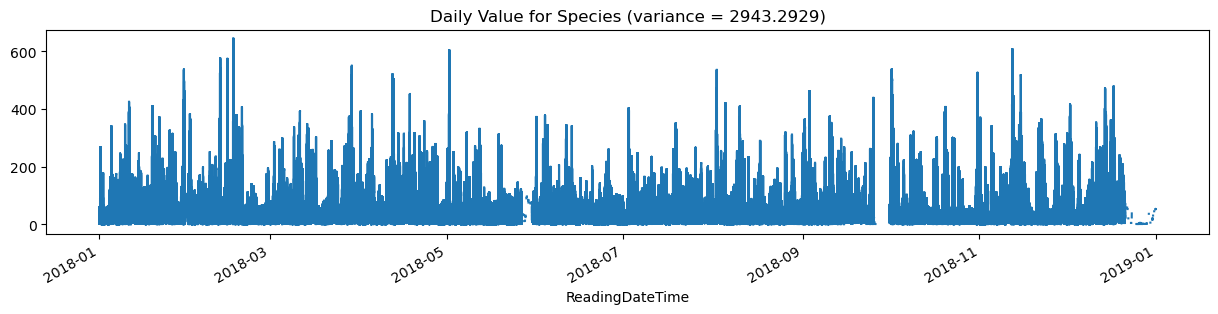

In [61]:
daily = pd.read_csv('./Data/LaqnData.csv', header='infer')
daily.index = pd.to_datetime(daily['ReadingDateTime'])
daily = daily['Value']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Value for Species (variance = %.4f)' % (daily.var()))

In [62]:
daily

ReadingDateTime
2018-01-01 00:00:00     NaN
2018-01-01 00:15:00     NaN
2018-01-01 00:30:00     NaN
2018-01-01 00:45:00     NaN
2018-01-01 01:00:00     NaN
                       ... 
2018-12-31 22:45:00    57.0
2018-12-31 23:00:00    61.1
2018-12-31 23:15:00    61.1
2018-12-31 23:30:00    61.1
2018-12-31 23:45:00    61.1
Name: Value, Length: 175200, dtype: float64

Text(0.5, 1.0, 'Monthly Value of Species (variance = 3670839748.8799)')

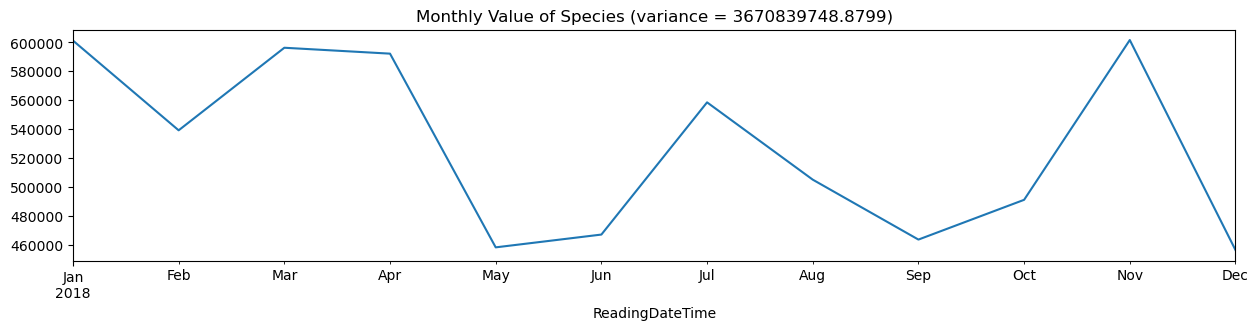

In [63]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Value of Species (variance = %.4f)' % (monthly.var()))

c:\Users\sho85\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


Text(0.5, 1.0, 'Annual Value of Species (variance = nan)')

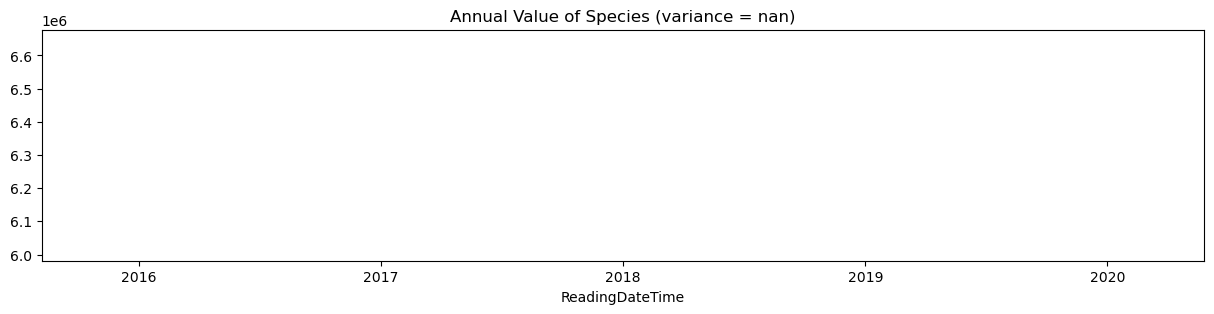

In [64]:
# WILL NOT USE SINCE OUR CSV ONLY HAS 1 YEAR (2018)
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Value of Species (variance = %.4f)' % (annual.var()))

# Sampling

In [65]:
drink_Data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,encoded_country
0,Afghanistan,0,0,0,0.0,Asia,0
1,Albania,89,132,54,4.9,Europe,1
2,Algeria,25,0,14,0.7,Africa,2
3,Andorra,245,138,312,12.4,Europe,3
4,Angola,217,57,45,5.9,Africa,4


In [66]:
sample = drink_Data.sample(n=3)
sample

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,encoded_country
120,Netherlands,251,88,190,9.4,Europe,121
139,Moldova,109,226,18,6.3,Europe,111
39,Congo,76,1,9,1.7,Africa,38


In [67]:
sample = drink_Data.sample(frac=0.01, random_state=1)
sample

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,encoded_country
44,Cyprus,192,154,113,8.2,Europe,44
69,Guatemala,53,69,2,2.2,North America,68


In [68]:
sample = air_Data.sample(frac=0.1, replace=True, random_state=1)
sample

,Site,ReadingDateTime,Value,Units,Provisional or Ratified,Species-CO,Species-NO,Species-NO2,Species-NOX,Species-O3
128037,HI0,27/08/2018 17:15,49.2,ug m-3 as NO2,R,0,0,0,1,0
5192,HI0,24/02/2018 02:00,NaN,mg m-3,P,1,0,0,0,0
50057,HI0,06/06/2018 10:15,5.4,ug m-3,R,0,1,0,0,0
109259,HI0,13/02/2018 02:45,21.2,ug m-3 as NO2,R,0,0,0,1,0
73349,HI0,04/02/2018 01:15,15.0,ug m-3,R,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
38124,HI0,02/02/2018 03:00,0.2,ug m-3,R,0,1,0,0,0
61423,HI0,02/10/2018 19:45,1.7,ug m-3,R,0,1,0,0,0
16011,HI0,16/06/2018 18:45,NaN,mg m-3,P,1,0,0,0,0
144902,HI0,19/02/2018 09:30,1.7,ug m-3,R,0,0,0,0,1


# Discretization

0.0     13
4.9      4
0.7      3
12.4     1
5.9      3
        ..
6.4      2
3.9      1
1.4      1
5.7      1
8.7      1
Name: total_litres_of_pure_alcohol, Length: 90, dtype: int64

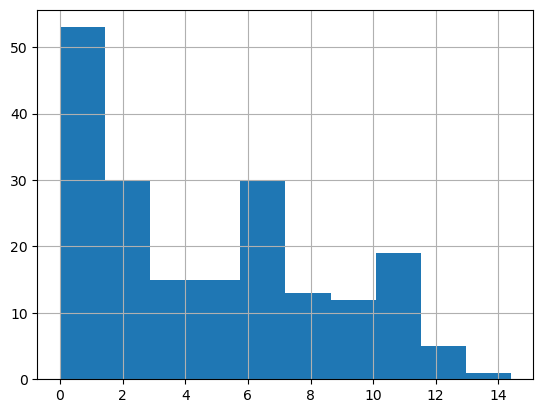

In [69]:
drink_Data['total_litres_of_pure_alcohol'].hist(bins=10)
drink_Data['total_litres_of_pure_alcohol'].value_counts(sort=False)

In [70]:
bins = pd.cut(drink_Data['total_litres_of_pure_alcohol'],4)
bins.value_counts(sort=False)

(-0.0144, 3.6]    87
(3.6, 7.2]        59
(7.2, 10.8]       33
(10.8, 14.4]      14
Name: total_litres_of_pure_alcohol, dtype: int64

In [71]:
bins = pd.qcut(drink_Data['total_litres_of_pure_alcohol'],4)
bins.value_counts(sort=False)

(-0.001, 1.3]    52
(1.3, 4.2]       45
(4.2, 7.2]       49
(7.2, 14.4]      47
Name: total_litres_of_pure_alcohol, dtype: int64

# Principal Component Analysis

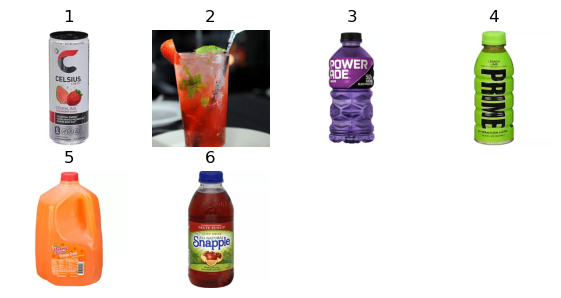

In [72]:
# PICTURES IS 256 x 256
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 6
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,196608))

for i in range(1,numImages+1):
    filename = 'data_Pic/Picture'+str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

In [73]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['drink'] = ['energy drink', 'alcohol','energy drink','energy drink', 'juice', 'juice']
projected

,pc1,pc2,drink
1,-13888.266845,-3824.372095,energy drink
2,60778.894246,-2701.257537,alcohol
3,-14213.624857,-9285.123620,energy drink
4,-14931.018828,-5056.830314,energy drink
5,-5714.527126,24482.476841,juice
6,-12031.456590,-3614.893275,juice


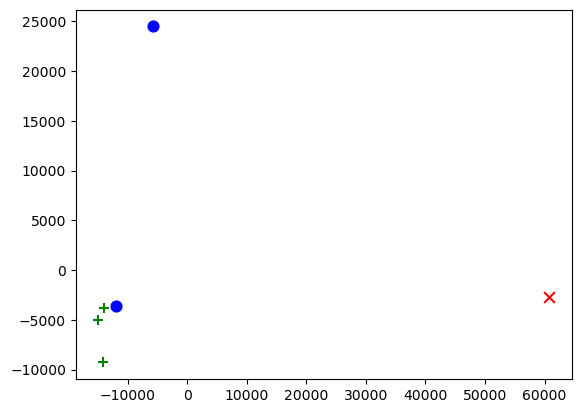

In [74]:
import matplotlib.pyplot as plt

colors = {'energy drink':'g', 'alcohol':'r', 'juice':'b'}
markerTypes = {'energy drink':'+', 'alcohol':'x', 'juice':'o'}

for drinkType in markerTypes:
    d = projected[projected['drink']==drinkType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[drinkType],s=60,marker=markerTypes[drinkType])